In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### **Load the dataset**

In [2]:
data_dir = './/datasets//flower_photos'

import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [3]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [4]:
img_cnt = len(list(data_dir.glob('*/*.jpg')))
print(img_cnt)

3670


Here are some roses:

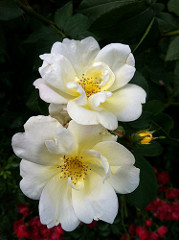

In [5]:
roses = list(data_dir.glob('roses/*.jpg'))
PIL.Image.open(str(roses[0]))

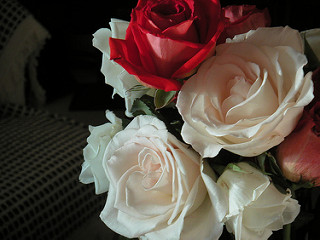

In [6]:
PIL.Image.open(str(roses[1]))

Here are some tulips:

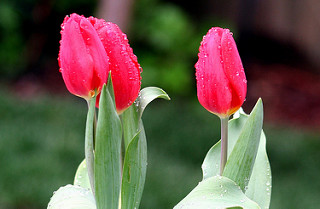

In [7]:
tulips = list(data_dir.glob('tulips/*.jpg'))
PIL.Image.open(tulips[0])

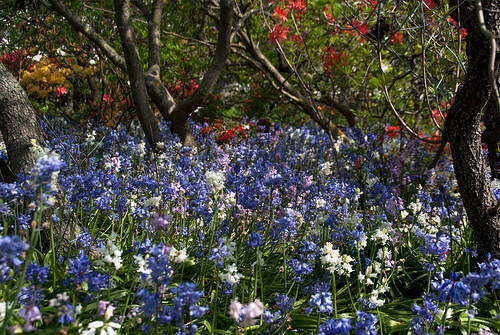

In [8]:
PIL.Image.open(tulips[1])

### **Load data using a Keras utility**

Ý nghĩa của hàm **tf.keras.utils.image_dataset_from_directory**:
Hàm này dùng để tạo các tập dữ liệu TensorFlow từ thư mục chứa ảnh. Nó tự động gắn nhãn (label) cho ảnh dựa trên cấu trúc thư mục. Cụ thể:

- Mỗi thư mục con trong thư mục gốc (data_dir) được coi là một lớp (class).
- Tên thư mục con được sử dụng làm tên của lớp.
- Ảnh trong mỗi thư mục con được gắn nhãn tương ứng với tên của thư mục đó.


##### Create a dataset

Define some parameters for the loader:

In [9]:
img_height = 180
img_width = 180
batch_size = 32 
# ví dụ dataset có 1000 ảnh, training set sẽ chứa 80% ảnh chia thành các batch, mỗi batch chứa 32 ảnh

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


##### Visualize the data

Here are some the first nine images from the training set:

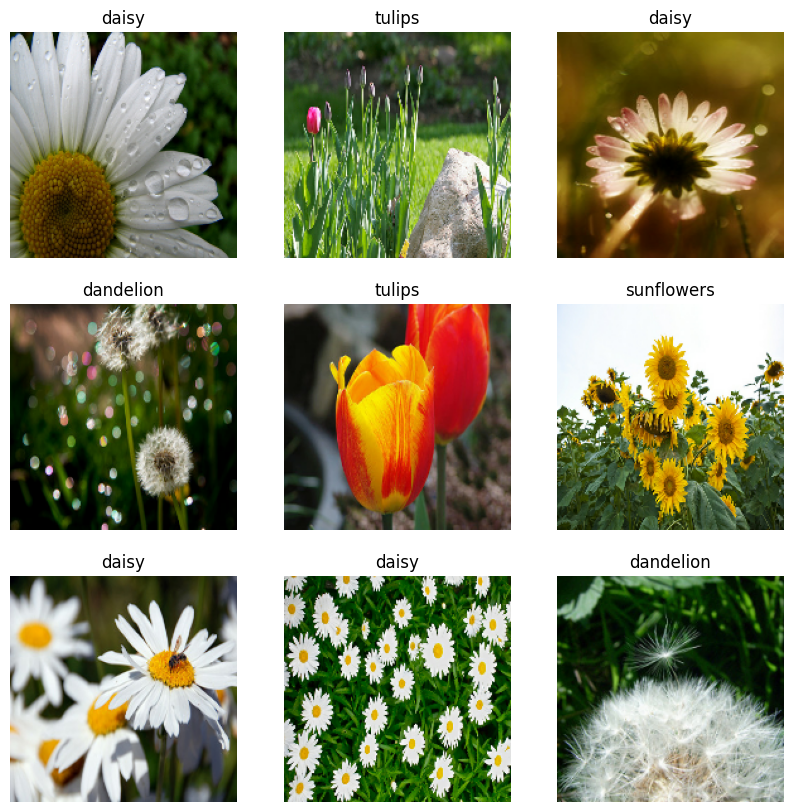

In [13]:
plt.figure(figsize= (10, 10))

for img, labels in train_ds.take(1):  # Lấy 1 batch đầu tiên
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        

##### Configure the dataset

In [14]:
AUTOTUNE = tf.data.AUTOTUNE 
# nó là 1 tham số tự động điều chỉnh để tối ưu hóa hiệu suất xử lý dữ liệu

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

- prefetch(buffer_size) là 1 method được sử dụng để tải trước các batch dữ liệu trong khi mô hình huấn luyện
- nó cho phép tf chuẩn bị dữ liệu sẵn sàng trong bộ nhớ để mô hình yêu cầu dữ liệu tiếp theo, nó thể xử lý ngay lập tức mà không bị gián đoạn

### **Build model CNN**

In [15]:
num_classes = len(class_names)

model_cnn = Sequential([
    # cnn
    layers.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
    layers.Conv2D(16, kernel_size= (3, 3), padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, kernel_size= (3, 3), padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, kernel_size= (3, 3), padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    
    # dense
    layers.Flatten(),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(num_classes, activation= 'softmax')
])

model_cnn.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

model_cnn.fit(train_ds, validation_data = val_ds, epochs = 10)

Epoch 1/10


d:\Python Download\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 219ms/step - accuracy: 0.3342 - loss: 1.6114 - val_accuracy: 0.5613 - val_loss: 1.0954
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 209ms/step - accuracy: 0.5962 - loss: 1.0376 - val_accuracy: 0.5736 - val_loss: 1.0464
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 186ms/step - accuracy: 0.6941 - loss: 0.8197 - val_accuracy: 0.6526 - val_loss: 0.9551
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 199ms/step - accuracy: 0.7584 - loss: 0.6531 - val_accuracy: 0.6362 - val_loss: 0.9783
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 259ms/step - accuracy: 0.8518 - loss: 0.4242 - val_accuracy: 0.6390 - val_loss: 1.1993
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 238ms/step - accuracy: 0.9236 - loss: 0.2431 - val_accuracy: 0.6322 - val_loss: 1.3863
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 206ms/step - accuracy: 0.9549 - loss: 0.1432 - val_accuracy: 0.6417 - val_loss: 1.6092
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 198ms/step - accuracy: 0.9859 - loss: 0.0611 - val_accuracy: 0.607

**You can see the results, the model is good on training set but not goodd on test set -> this means that the model is overfitting.**

### **Using Data Augmentation to solve the overfitting problem**

##### Set up data augmentation first

In [16]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal',
                      input_shape = (img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

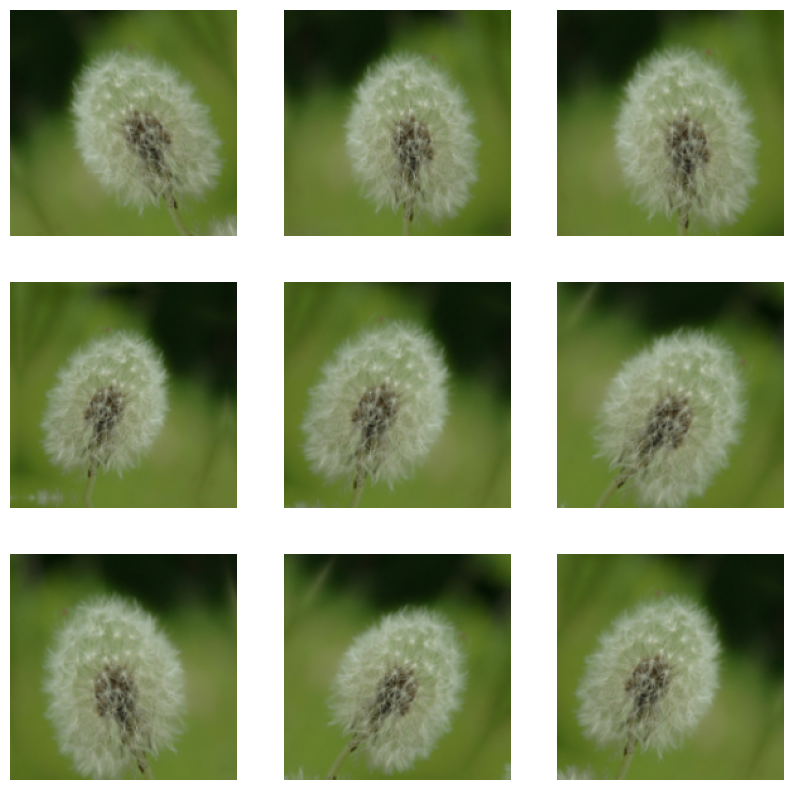

In [17]:
plt.figure(figsize = (10, 10))

for img, labels in train_ds.take(1):
    for i in range(9):
        augmented_img = data_augmentation(img)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_img[1].numpy().astype("uint8"))
        plt.axis("off")

##### Build model using data augmentation

In [32]:
model_data_aug = Sequential([
    # data augmentation
    data_augmentation,
    
    # cnn
    layers.Rescaling(1./255),
    layers.Conv2D(16, kernel_size= (3, 3), padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, kernel_size= (3, 3), padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, kernel_size= (3, 3), padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    
    # dense
    layers.Flatten(),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(num_classes, name = 'outputs')
])

model_data_aug.compile(optimizer = 'adam',
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                       metrics = ['accuracy'])

model_data_aug.fit(train_ds, validation_data = val_ds, epochs= 15)

Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 25s 229ms/step - accuracy: 0.3418 - loss: 1.5832 - val_accuracy: 0.5545 - val_loss: 1.0943
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 244ms/step - accuracy: 0.5586 - loss: 1.0690 - val_accuracy: 0.5899 - val_loss: 1.0227
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 232ms/step - accuracy: 0.6390 - loss: 0.9495 - val_accuracy: 0.6144 - val_loss: 0.9816
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 232ms/step - accuracy: 0.6314 - loss: 0.9178 - val_accuracy: 0.6771 - val_loss: 0.8442
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 277ms/step - accuracy: 0.6575 - loss: 0.8559 - val_accuracy: 0.6812 - val_loss: 0.8252
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 31s 335ms/step - accuracy: 0.6896 - loss: 0.8125 - val_accuracy: 0.7071 - val_loss: 0.8012
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 25s 276ms/step - accuracy: 0.7010 - loss: 0.7684 - val_accuracy: 0.6853 - val_loss: 0.8275
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 25s 272ms/step - accuracy: 0.7334 - loss: 0.6872 - val_accu

**You can see the result after using data augmentation and dropout, the accuracy on training set decreased but the accuracy on test set increase and quitely equivalent to the accuracy on training set. This means that the overfitting problem has solved partly**

In [33]:
model_data_aug.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,967,857 (45.65 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,978,572 (30.44 MB)

### **Predict on new data**

In [21]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file("Red_sunflower", origin= sunflower_url, cache_dir= '.')

img = tf.keras.utils.load_img(
    sunflower_path, target_size = (img_height, img_width)
)

In [34]:
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img, 0)

predictions = model_data_aug.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(predictions)
print(score)

print(
    "This image most likely belongs to {} with a {:.2f} percent."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step
[[-4.5255084 -1.0351865 -1.67511    6.071905   2.00657  ]]
tf.Tensor([2.4528379e-05 8.0444518e-04 4.2421051e-04 9.8190010e-01 1.6846690e-02], shape=(5,), dtype=float32)
This image most likely belongs to sunflowers with a 98.19 percent.
